In [525]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
import func4behav as fb
import imp
imp.reload(fb)

<module 'func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

### By subjects but all

In [526]:
behavior_compare = fb.create_all_subs_together()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.table_allsubs_together(subject_id, behavior_before, behavior_after, behavior_compare, verbose=False)

show_compare = behavior_compare.loc[behavior_compare['Real stimulation'] == 0]
styled = show_compare.style.bar(subset=['RT mean before', 'RT mean after',
                                             'RT median before', 'RT median after', 'RT mean shorten %', 'RT median shorten %'], align='mid', color= '#1338BE')
display(styled)

show_compare = behavior_compare.loc[behavior_compare['Real stimulation'] == 1]
styled = show_compare.style.bar(subset=['RT mean before', 'RT mean after',
                                             'RT median before', 'RT median after', 'RT mean shorten %', 'RT median shorten %'], align='mid', color= '#d65f5f')
display(styled)


,subject id,Real stimulation,RT mean before,RT mean after,RT median before,RT median after,RT mean shorten %,RT median shorten %
1,2,0,361.837500,314.100598,348.360000,307.640000,13.192912,11.689057
5,6,0,286.577311,303.839916,268.330000,292.230000,-6.023717,-8.906943
6,7,0,300.601513,283.992101,281.880000,260.700000,5.525392,7.513836
7,8,0,279.746807,235.567179,265.570000,221.360000,15.792719,16.647212
9,10,0,276.444867,261.213220,261.250000,250.275000,5.509832,4.200957
10,11,0,288.828898,246.536983,260.705000,240.855000,14.642550,7.613970
13,14,0,376.162373,321.599500,355.780000,305.225000,14.505138,14.209624
14,15,0,399.210833,390.303103,385.360000,363.225000,2.231335,5.743980
15,16,0,314.536833,292.431667,303.660000,280.275000,7.027847,7.701047


,subject id,Real stimulation,RT mean before,RT mean after,RT median before,RT median after,RT mean shorten %,RT median shorten %
0,1,1,231.848908,192.074914,213.400000,184.795000,17.155135,13.404405
2,3,1,265.423529,220.153017,241.900000,206.715000,17.055953,14.545267
3,4,1,297.465268,321.429519,243.500000,260.265000,-8.056151,-6.885010
4,5,1,329.741776,256.870708,307.930000,248.830000,22.099434,19.192674
8,9,1,358.072353,325.204583,339.520000,304.665000,9.179086,10.265964
11,12,1,267.378151,314.006583,247.850000,289.710000,-17.439133,-16.889248
12,13,1,271.824333,298.238667,257.595000,288.520000,-9.717428,-12.005280
16,17,1,406.156356,386.313750,393.515000,365.335000,4.885460,7.161099
17,18,1,326.744622,314.336303,314.330000,284.820000,3.797559,9.388223


In [527]:
real_ids = [1, 3, 4, 5, 9, 12, 13, 17, 18]
sham_ids = [2, 6, 7, 8, 10, 11, 14, 15, 16]
behavior_compare = behavior_compare.loc[behavior_compare['subject id'].isin(real_ids+sham_ids)]

rt_sham_before = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, 'RT mean before'].tolist()
rt_sham_after = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, 'RT mean after'].tolist()
rt_real_before = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, 'RT mean before'].tolist()
rt_real_after = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, 'RT mean after'].tolist()

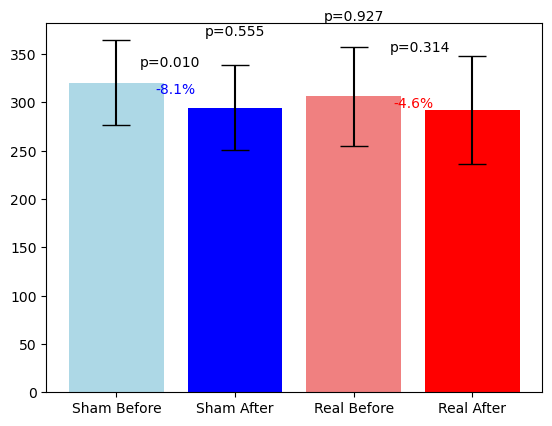

In [528]:
# 1. Calculate means and standard deviations
mean_sham_before = np.mean(rt_sham_before)
std_sham_before = np.std(rt_sham_before)
mean_sham_after = np.mean(rt_sham_after)
std_sham_after = np.std(rt_sham_after)
mean_real_before = np.mean(rt_real_before)
std_real_before = np.std(rt_real_before)
mean_real_after = np.mean(rt_real_after)
std_real_after = np.std(rt_real_after)

# 2. Plotting
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
means = [mean_sham_before, mean_sham_after, mean_real_before, mean_real_after]
std_devs = [std_sham_before, std_sham_after, std_real_before, std_real_after]
colors = ['lightblue', 'blue', 'lightcoral', 'red']

fig, ax = plt.subplots()

bars = ax.bar(labels, means, yerr=std_devs, color=colors, capsize=10)

# 3. Statistical tests and annotations
# Calculate p-values
_, p_sham = ttest_rel(rt_sham_before, rt_sham_after)
_, p_real = ttest_rel(rt_real_before, rt_real_after)
_, p_before = ttest_ind(rt_sham_before, rt_real_before)
_, p_after = ttest_ind(rt_sham_after, rt_real_after)

# Calculate percentage changes
percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

# Annotate the p-values
heights = [bar.get_height() for bar in bars]
max_height = max(heights)

# Adjusting the positions for annotations based on your bar heights
position_adjustments = [0.05, 0.10, 0.15, 0.20]  # You might need to tweak these values

ax.text(0.2, max_height + position_adjustments[0]*max_height, f'p={p_sham:.3f}')
ax.text(2.3, max_height + position_adjustments[1]*max_height, f'p={p_real:.3f}')
ax.text(1, max_height + position_adjustments[2]*max_height, f'p={p_before:.3f}', ha='center')
ax.text(2, max_height + position_adjustments[3]*max_height, f'p={p_after:.3f}', ha='center')

# Add percentage changes
ax.text(0.5, heights[0], f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue')
ax.text(2.5, heights[2], f'{percent_change_real:.1f}%', ha='center', va='top', color='red')

plt.show()


## By trials

In [529]:
behavior_compare, experiment = fb.create_allsubs_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)
    behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)
display(behavior_compare)

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,2,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,3,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,4,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,5,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...,...
4315,18,116,1,after,1,-1,1,1.0,-1,1,0.24539
4316,18,117,1,after,1,1,1,1.0,1,1,0.21152
4317,18,118,1,after,2,1,-1,1.0,-1,1,0.32075
4318,18,119,1,after,2,-1,-1,0.5,1,1,0.46414


In [530]:
case = 'endo invalid'
behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & (behavior_compare['reaction time'] > 0.05) & (behavior_compare['reaction time'] < 1)]
behavior_before, behavior_after = fb.filter_behav(case, behavior_compare.loc[behavior_compare['session'] == 'before'], 
                                                  behavior_compare.loc[behavior_compare['session'] == 'after'])

behavior_compare = pd.concat([behavior_before, behavior_after])
rt_sham_before = behavior_before.loc[behavior_compare['Real stimulation'] == 0]
rt_sham_after = behavior_after.loc[behavior_compare['Real stimulation'] == 0 ]
rt_real_before = behavior_before.loc[behavior_compare['Real stimulation'] == 1]
rt_real_after = behavior_after.loc[behavior_compare['Real stimulation'] == 1]

# preprocessing
k_out = [1, 1, 1, 1]
rt_sham_before = fb.remove_outlier(rt_sham_before, k=k_out[0], left=False, right=True, verbose=True)
rt_sham_after = fb.remove_outlier(rt_sham_after, k=k_out[1], left=True, right=False, verbose=True)
rt_real_before = fb.remove_outlier(rt_real_before, k=k_out[2], left=True, right=False, verbose=True)
rt_real_after = fb.remove_outlier(rt_real_after, k=k_out[3], left=False, right=True, verbose=True)

rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()
rt_sham_before = [num * 1000 for num in rt_sham_before]
rt_sham_after = [num * 1000 for num in rt_sham_after]
rt_real_before = [num * 1000 for num in rt_real_before]
rt_real_after = [num * 1000 for num in rt_real_after]

Removed outliers: 103-94=9
Removed outliers: 102-101=1
Removed outliers: 104-104=0
Removed outliers: 96-92=4


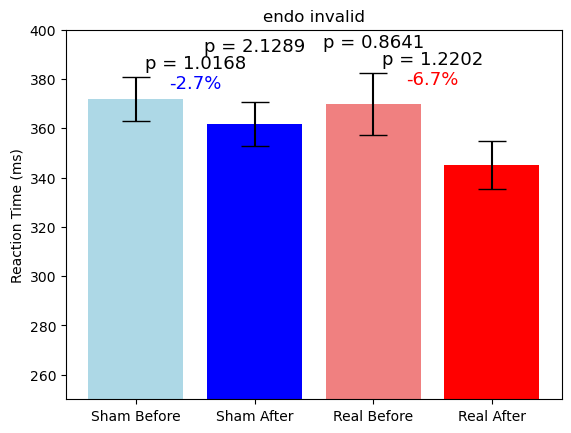

In [531]:
# Calculate means
means = [np.mean(rt_sham_before), np.mean(rt_sham_after), np.mean(rt_real_before), np.mean(rt_real_after)]

# Calculate standard errors
std_errors = [
    np.std(rt_sham_before) / np.sqrt(len(rt_sham_before)), np.std(rt_sham_after) / np.sqrt(len(rt_sham_after)),
    np.std(rt_real_before) / np.sqrt(len(rt_real_before)), np.std(rt_real_after) / np.sqrt(len(rt_real_after))
]

# Calculate t-tests
_, p_sham = mannwhitneyu(rt_sham_before, rt_sham_after)
_, p_real = mannwhitneyu(rt_real_before, rt_real_after)
_, p_before = mannwhitneyu(rt_sham_before, rt_real_before)
_, p_after = mannwhitneyu(rt_sham_after, rt_real_after)


# Calculate percentage changes
percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

# Bar chart
labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
colors = ['lightblue', 'blue', 'lightcoral', 'red']

fig, ax = plt.subplots()

bars = ax.bar(labels, means, yerr=std_errors, color=colors, capsize=10)

# Add p-values
heights = [bar.get_height() + error for bar, error in zip(bars, std_errors)]
fsize = 13
ax.text(0.5, heights[0] + 2, f'p = {p_sham*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(2.5, heights[2] + 2, f'p = {p_real*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(1, heights[0] + 9, f'p = {p_before*4:.4f}', ha='center', va='bottom', fontsize=fsize)
ax.text(2, heights[2] + 9, f'p = {p_after*4:.4f}', ha='center', va='bottom', fontsize=fsize)

# Add percentage changes
ax.text(0.5, heights[0] + 1, f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue', fontsize=fsize)
ax.text(2.5, heights[2] + 1, f'{percent_change_real:.1f}%', ha='center', va='top', color='red', fontsize=fsize)

# Add some additional formatting if desired
ax.set_ylabel('Reaction Time (ms)')
ax.set_title(case)
ax.set_ylim([250, 400])  # Adjust as needed

plt.show()

In [532]:
def plot_compare(case):
    behavior_compare, experiment = fb.create_allsubs_compare()
    for subject_id in range (1,19):
        behavior_before, behavior_after = fb.load_behavior(subject_id)
        behavior_compare = fb.allsubs_compare(subject_id, behavior_before, behavior_after, behavior_compare, experiment, verbose=False)

    behavior_compare = behavior_compare.loc[(behavior_compare['response'] == 1) & 
                                            (behavior_compare['reaction time'] > 0.05) & (behavior_compare['reaction time'] < 1)]
    behavior_before, behavior_after = fb.filter_behav(case, behavior_compare.loc[behavior_compare['session'] == 'before'], 
                                                    behavior_compare.loc[behavior_compare['session'] == 'after'])

    behavior_compare = pd.concat([behavior_before, behavior_after])
    rt_sham_before = behavior_before.loc[behavior_compare['Real stimulation'] == 0]
    rt_sham_after = behavior_after.loc[behavior_compare['Real stimulation'] == 0 ]
    rt_real_before = behavior_before.loc[behavior_compare['Real stimulation'] == 1]
    rt_real_after = behavior_after.loc[behavior_compare['Real stimulation'] == 1]

    # preprocessing
    k_out = [1, 1, 1, 1]
    rt_sham_before = fb.remove_outlier(rt_sham_before, k=k_out[0], left=False, right=True, verbose=True)
    rt_sham_after = fb.remove_outlier(rt_sham_after, k=k_out[1], left=True, right=False, verbose=True)
    rt_real_before = fb.remove_outlier(rt_real_before, k=k_out[2], left=True, right=False, verbose=True)
    rt_real_after = fb.remove_outlier(rt_real_after, k=k_out[3], left=False, right=True, verbose=True)

    rt_sham_before = rt_sham_before.loc[:, 'reaction time'].tolist()
    rt_sham_after = rt_sham_after.loc[:, 'reaction time'].tolist()
    rt_real_before = rt_real_before.loc[:, 'reaction time'].tolist()
    rt_real_after = rt_real_after.loc[:, 'reaction time'].tolist()
    rt_sham_before = [num * 1000 for num in rt_sham_before]
    rt_sham_after = [num * 1000 for num in rt_sham_after]
    rt_real_before = [num * 1000 for num in rt_real_before]
    rt_real_after = [num * 1000 for num in rt_real_after]

    
    # Calculate means
    means = [np.mean(rt_sham_before), np.mean(rt_sham_after), np.mean(rt_real_before), np.mean(rt_real_after)]

    # Calculate standard errors
    std_errors = [
        np.std(rt_sham_before) / np.sqrt(len(rt_sham_before)), np.std(rt_sham_after) / np.sqrt(len(rt_sham_after)),
        np.std(rt_real_before) / np.sqrt(len(rt_real_before)), np.std(rt_real_after) / np.sqrt(len(rt_real_after))
    ]

    # Calculate t-tests
    _, p_sham = mannwhitneyu(rt_sham_before, rt_sham_after)
    _, p_real = mannwhitneyu(rt_real_before, rt_real_after)
    _, p_before = mannwhitneyu(rt_sham_before, rt_real_before)
    _, p_after = mannwhitneyu(rt_sham_after, rt_real_after)


    # Calculate percentage changes
    percent_change_sham = ((np.mean(rt_sham_after) - np.mean(rt_sham_before)) / np.mean(rt_sham_before)) * 100
    percent_change_real = ((np.mean(rt_real_after) - np.mean(rt_real_before)) / np.mean(rt_real_before)) * 100

    # Bar chart
    labels = ['Sham Before', 'Sham After', 'Real Before', 'Real After']
    colors = ['lightblue', 'blue', 'lightcoral', 'red']

    fig, ax = plt.subplots()

    bars = ax.bar(labels, means, yerr=std_errors, color=colors, capsize=10)

    # Add p-values
    heights = [bar.get_height() + error for bar, error in zip(bars, std_errors)]
    fsize = 13
    ax.text(0.5, heights[0] + 2, f'p = {p_sham*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(2.5, heights[2] + 2, f'p = {p_real*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(1, heights[0] + 8, f'p = {p_before*4:.4f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(2, heights[2] + 8, f'p = {p_after*4:.4f}', ha='center', va='bottom', fontsize=fsize)

    # Add percentage changes
    ax.text(0.5, heights[0] + 1, f'{percent_change_sham:.1f}%', ha='center', va='top', color='blue', fontsize=fsize)
    ax.text(2.5, heights[2] + 1, f'{percent_change_real:.1f}%', ha='center', va='top', color='red', fontsize=fsize)

    # Add some additional formatting if desired
    ax.set_ylabel('Reaction Time (ms)')
    ax.set_title(case)
    ax.set_ylim([250, 400])  # Adjust as needed

    save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', case +'.png')
    plt.savefig(save_path, format='png')

Plotting all...
Removed outliers: 1060-997=63
Removed outliers: 1062-1055=7
Removed outliers: 1051-1050=1
Removed outliers: 1043-974=69
Plotting endo...
Removed outliers: 529-494=35
Removed outliers: 531-526=5
Removed outliers: 530-529=1
Removed outliers: 520-478=42
Plotting exo...
Removed outliers: 531-503=28
Removed outliers: 531-526=5
Removed outliers: 521-520=1
Removed outliers: 523-488=35
Plotting valid...
Removed outliers: 850-806=44
Removed outliers: 853-846=7
Removed outliers: 844-842=2
Removed outliers: 840-793=47
Plotting endo valid...
Removed outliers: 426-400=26
Removed outliers: 429-418=11
Removed outliers: 426-425=1
Removed outliers: 424-406=18
Plotting exo valid...
Removed outliers: 424-400=24
Removed outliers: 424-422=2
Removed outliers: 418-417=1
Removed outliers: 416-393=23
Plotting invalid...
Removed outliers: 210-195=15
Removed outliers: 209-206=3
Removed outliers: 207-207=0
Removed outliers: 203-193=10
Plotting endo invalid...
Removed outliers: 103-94=9
Removed out

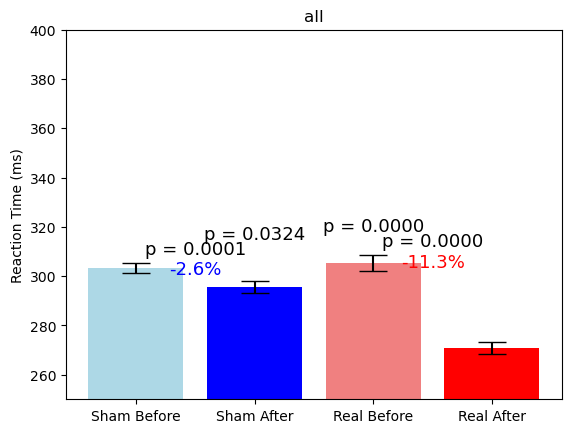

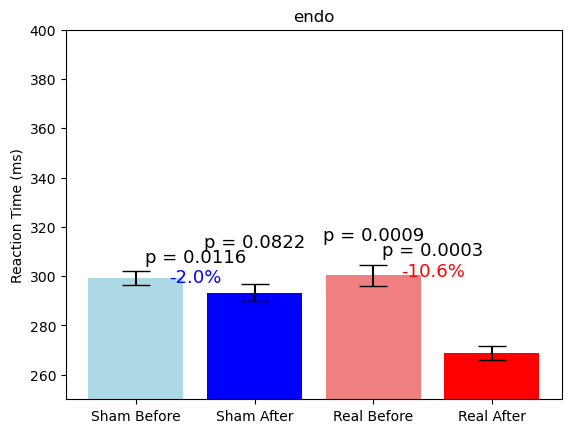

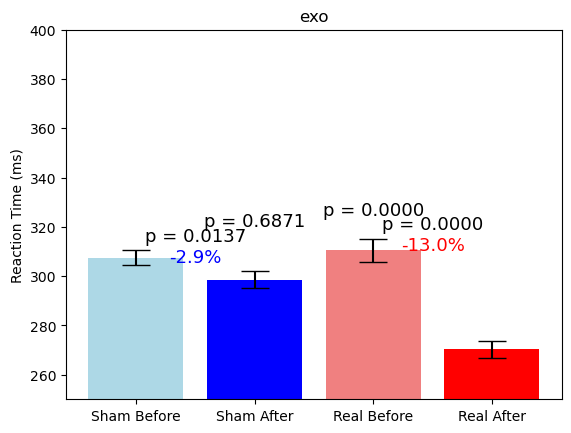

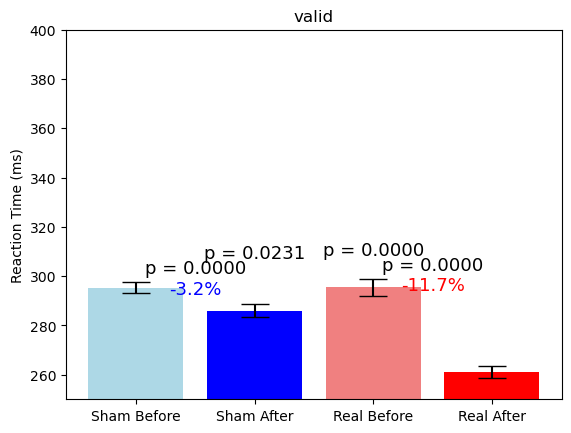

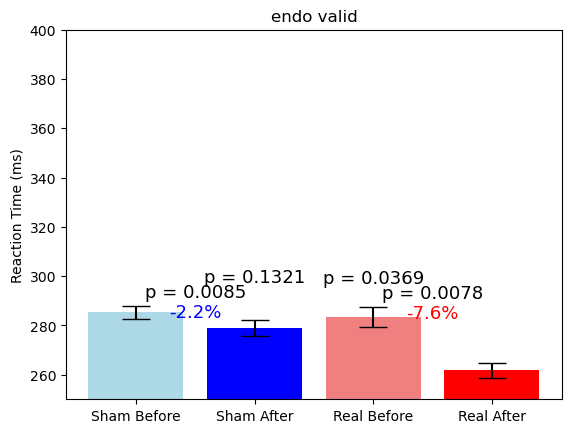

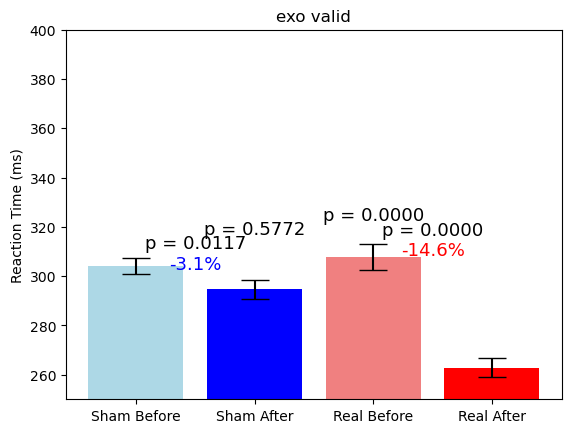

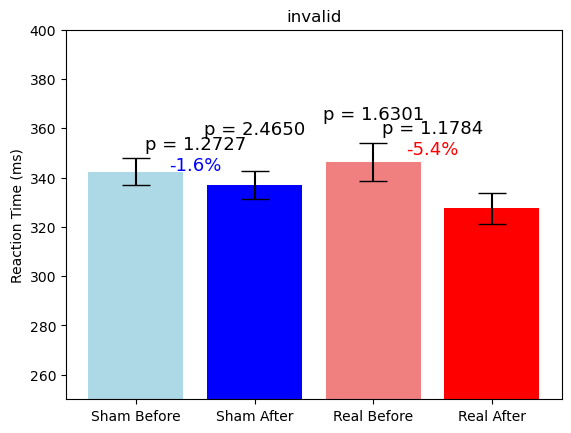

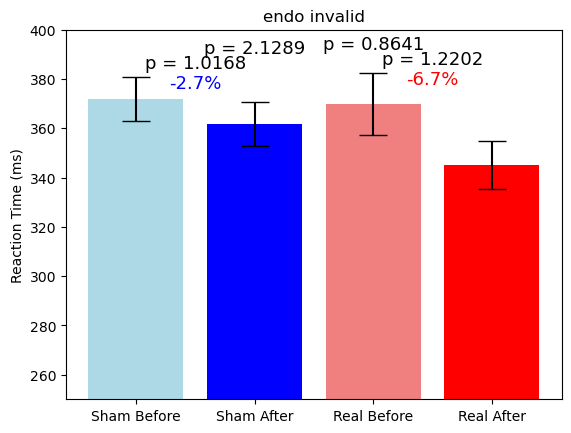

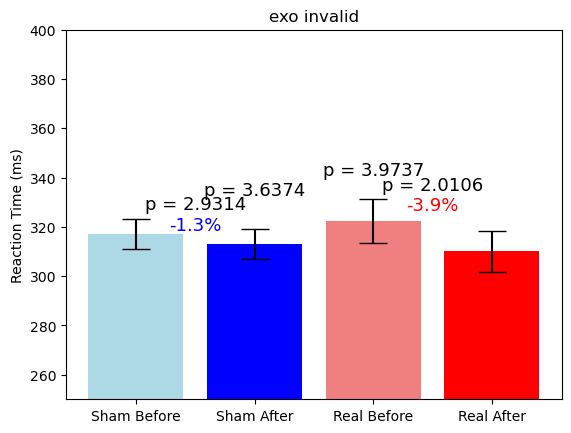

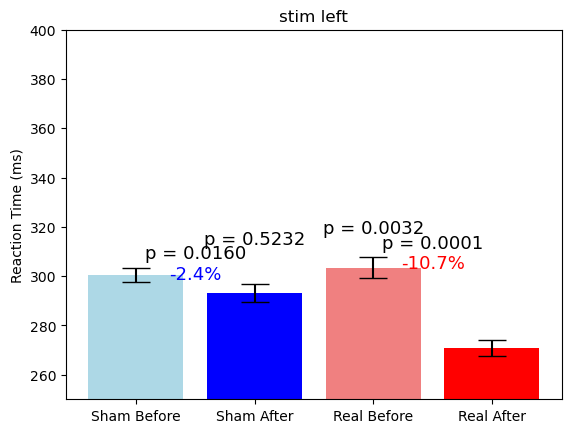

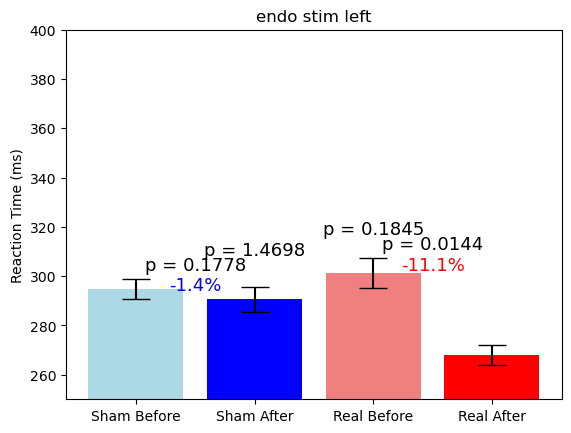

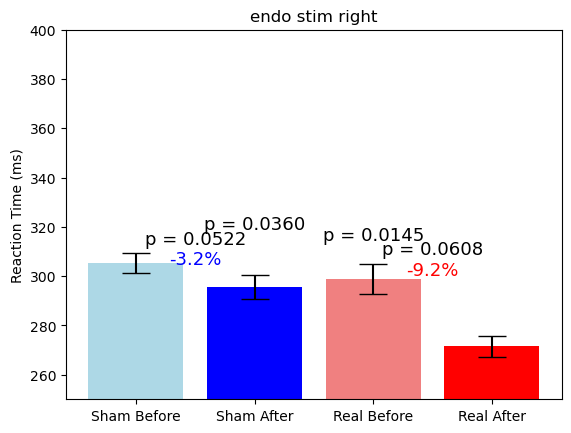

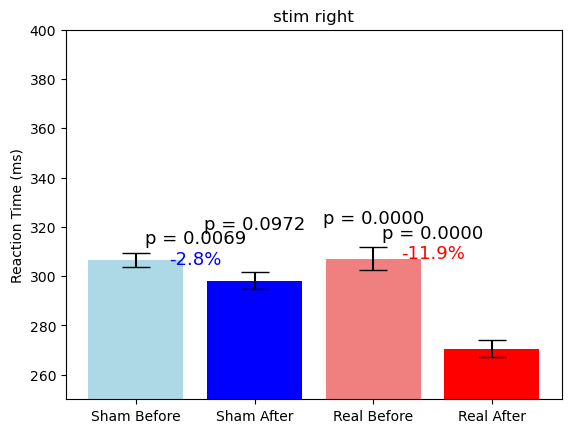

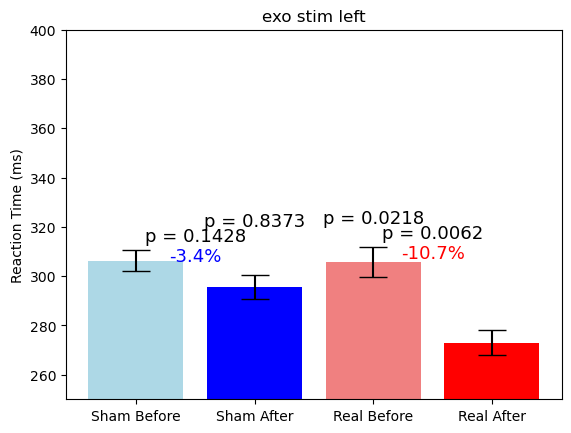

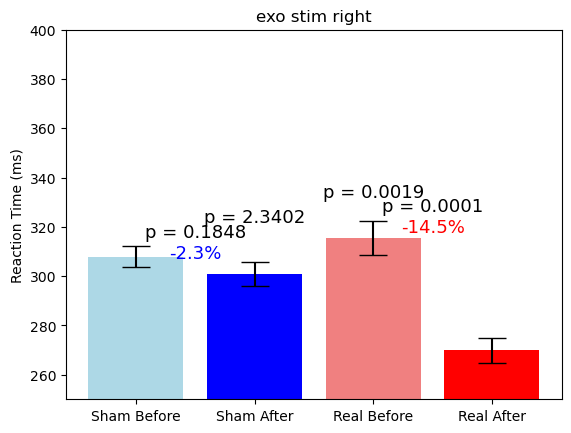

In [533]:
case_list = ['all', 'endo', 'exo', 'valid', 'endo valid', 'exo valid', 'invalid', 'endo invalid', 'exo invalid', 'stim left', 'endo stim left', 'endo stim right', 'stim right', 'exo stim left', 'exo stim right']
for case in case_list:
    print("Plotting " + case + "...")
    isTrue = plot_compare(case)

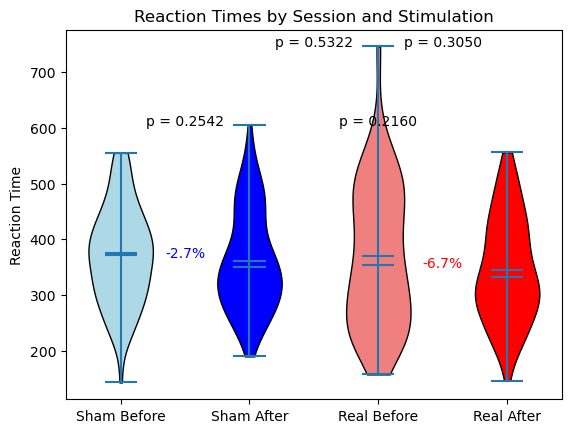

In [534]:
# Assuming you've already calculated means, std_errors, t-tests, etc. as in your previous code.

# Combine data for violin plot
data = [rt_sham_before, rt_sham_after, rt_real_before, rt_real_after]

fig, ax = plt.subplots()

# Create violin plots
parts = ax.violinplot(data, showmeans=True, showextrema=True, showmedians=True)

# Adjust colors
for i, body in enumerate(parts['bodies']):
    body.set_facecolor(colors[i])
    body.set_edgecolor('black')
    body.set_alpha(1)

# Set x-ticks labels
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)

# Add p-values
# I'm slightly adjusting the positions where you plot the p-values, 
# because the violin plots are oriented differently than bars.
ax.text(1.5, max(np.max(rt_sham_before), np.max(rt_sham_after)) + 0.005, f'p = {p_sham:.4f}', ha='center')
ax.text(3.5, max(np.max(rt_real_before), np.max(rt_real_after)) + 0.005, f'p = {p_real:.4f}', ha='center')
ax.text(2.5, max(np.max(rt_sham_before), np.max(rt_real_before)) + 0.015, f'p = {p_before:.4f}', ha='center')
ax.text(3, max(np.max(rt_sham_after), np.max(rt_real_after)) + 0.015, f'p = {p_after:.4f}', ha='center')

# Add percentage changes
# Similarly, I'm slightly adjusting the positions for percentage changes.
ax.text(1.5, np.mean(rt_sham_after) - 0.003, f'{percent_change_sham:.1f}%', ha='center', va='bottom', color='blue')
ax.text(3.5, np.mean(rt_real_after) - 0.003, f'{percent_change_real:.1f}%', ha='center', va='bottom', color='red')

# Add some additional formatting if desired
ax.set_ylabel('Reaction Time')
ax.set_title('Reaction Times by Session and Stimulation')
# Adjust y-limits if necessary.
# ax.set_ylim([0.25, 0.35])

plt.show()


ValueError: X must have 2 or fewer dimensions

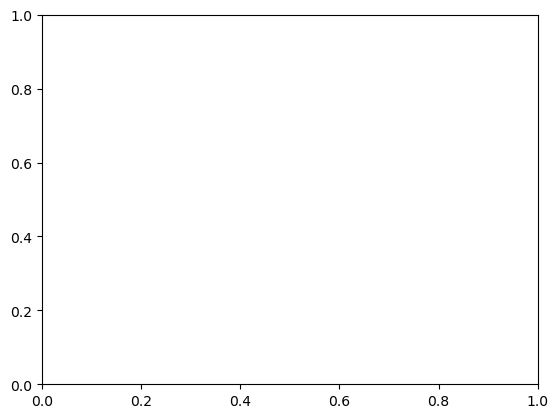

In [535]:
# box plot of RT difference
# for compare_object in compare_objects:

# watch = 'All'
# save_path = os.path.join('..', '..', '..', 'docs', 'report', 'figs', watch+"_"+compare_object+'.png')

# create boxplot
# Create a box plot with whiskers
fig, ax = plt.subplots()
boxplots = ax.boxplot([rt_sham, rt_real], patch_artist=True, widths=0.6, showfliers=False)

# Set colors for the box plots
colors = ['#1f77b4', '#d62728']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color to black
for median in boxplots['medians']:
    median.set_color('black')

plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for all subjects together')

# Perform the Mann-Whitney U test
U, p_value = stats.mannwhitneyu(rt_sham, rt_real)

# Add the p-value to the plot
ax.annotate(f'p = {p_value}', # :.4f means 4 decimal places
            xy=(-0.1, -0.1),
            xycoords=('axes fraction', 'axes fraction'),
            ha='left', fontsize=12)
# plt.savefig(save_path, format='png')

plt.show()

## Distribution

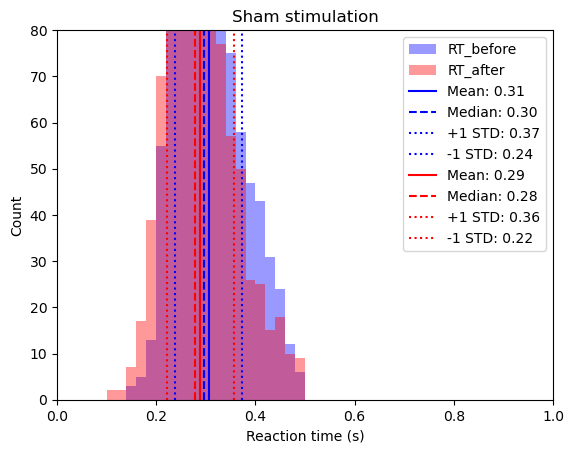

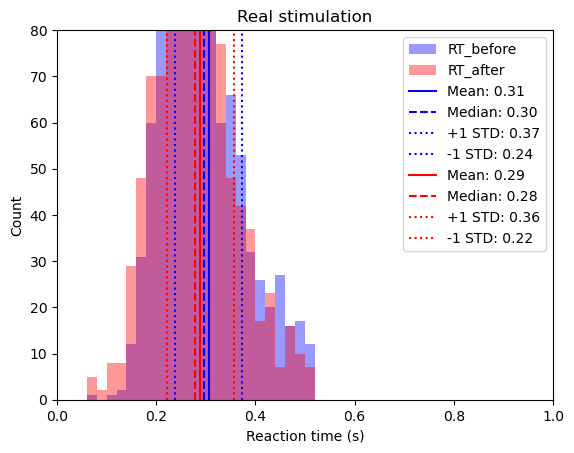

In [ ]:
bin_size = 50
xmax = 1
ymax = 80
bin_edges = np.linspace(0, xmax, bin_size+1)

mu_before, median_before, sigma_before = np.mean(rt_sham_before), np.median(rt_sham_before), np.std(rt_sham_before)
mu_after, median_after, sigma_after = np.mean(rt_sham_after), np.median(rt_sham_after), np.std(rt_sham_after)

fig, ax = plt.subplots()

ax.hist(rt_sham_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_sham_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Sham stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(rt_real_before, bins=bin_edges, color='blue', alpha=0.4, label='RT_before')
ax.hist(rt_real_after, bins=bin_edges, color='red', alpha=0.4, label='RT_after')

ax.axvline(mu_before, color='blue', linestyle='solid', label=f'Mean: {mu_before:.2f}')
ax.axvline(median_before, color='blue', linestyle='dashed', label=f'Median: {median_before:.2f}')
ax.axvline(mu_before+sigma_before, color='blue', linestyle='dotted', label=f'+1 STD: {mu_before+sigma_before:.2f}')
ax.axvline(mu_before-sigma_before, color='blue', linestyle='dotted', label=f'-1 STD: {mu_before-sigma_before:.2f}')

ax.axvline(mu_after, color='red', linestyle='solid', label=f'Mean: {mu_after:.2f}')
ax.axvline(median_after, color='red', linestyle='dashed', label=f'Median: {median_after:.2f}')
ax.axvline(mu_after+sigma_after, color='red', linestyle='dotted', label=f'+1 STD: {mu_after+sigma_after:.2f}')
ax.axvline(mu_after-sigma_after, color='red', linestyle='dotted', label=f'-1 STD: {mu_after-sigma_after:.2f}')

plt.title('Real stimulation')
plt.xlabel('Reaction time (s)')
plt.ylabel('Count')
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.legend()
plt.show()

### Behavior by time

In [ ]:
behavior_compare

,subject id,trial,Real stimulation,session,type,cue,valid,ICS,stim,response,reaction time
0,1,1,1,before,2,1,1,0.5,1,1,0.27437
1,1,2,1,before,2,-1,1,1.0,-1,1,0.21226
2,1,3,1,before,1,-1,-1,0.5,1,1,0.40884
3,1,4,1,before,1,-1,-1,0.5,1,1,0.22220
4,1,5,1,before,1,1,1,1.0,1,1,0.19879
...,...,...,...,...,...,...,...,...,...,...,...
4315,18,116,1,after,1,-1,1,1.0,-1,1,0.24539
4316,18,117,1,after,1,1,1,1.0,1,1,0.21152
4317,18,118,1,after,2,1,-1,1.0,-1,1,0.32075
4318,18,119,1,after,2,-1,-1,0.5,1,1,0.46414


In [ ]:
all_real = [1, 3, 4, 5, 9, 12, 13, 17, 18]
all_sham = [2, 6, 7, 8, 10, 11, 14, 15, 16]

behav_over_sham_before = np.ndarray(shape=(9, 120))
behav_over_sham_after = np.ndarray(shape=(9, 120))
behav_over_real_before = np.ndarray(shape=(9, 120))
behav_over_real_after = np.ndarray(shape=(9, 120))

real_id = 0
sham_id = 0

for sub in all_real:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_real_before[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_real_after[real_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    real_id += 1

for sub in all_sham:
    current_sub = behavior_compare[behavior_compare['subject id'] == sub]
    for idx in current_sub.index:
        if current_sub.at[idx, 'session'] == 'before':
            behav_over_sham_before[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']  
        else:
            behav_over_sham_after[sham_id, current_sub.at[idx, 'trial']-1] = current_sub.at[idx, 'reaction time']
    sham_id += 1

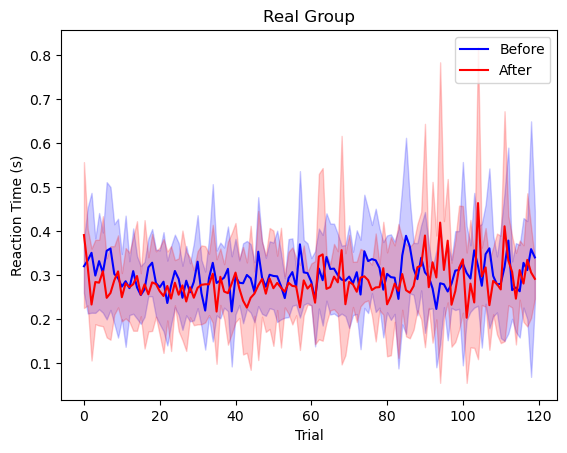

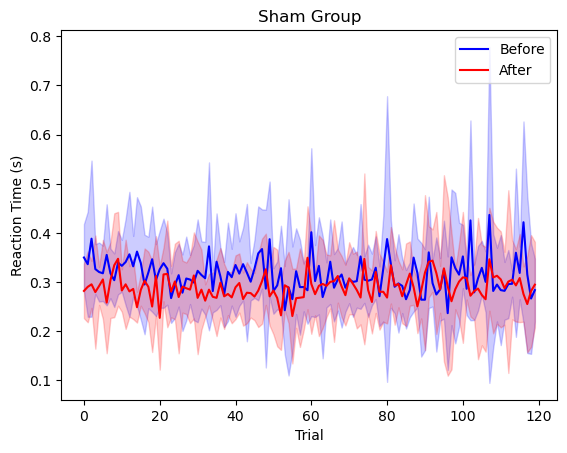

In [ ]:
def plot_line_chart(data_before, data_after, title):
    # Calculate the mean and standard deviation, ignoring uninitialized values
    mean_before = np.nanmean(data_before, axis=0)
    std_before = np.nanstd(data_before, axis=0)
    mean_after = np.nanmean(data_after, axis=0)
    std_after = np.nanstd(data_after, axis=0)

    # Plot mean lines
    plt.plot(mean_before, color='blue', label='Before')
    plt.plot(mean_after, color='red', label='After')

    # Plot shaded areas for standard deviation
    plt.fill_between(range(len(mean_before)), mean_before - std_before, mean_before + std_before, color='blue', alpha=0.2)
    plt.fill_between(range(len(mean_after)), mean_after - std_after, mean_after + std_after, color='red', alpha=0.2)

    plt.title(title)
    plt.xlabel('Trial')
    plt.ylabel('Reaction Time (s)')
    plt.legend()
    plt.show()

# Replace uninitialized values with NaN to ignore them in mean and std calculations
behav_over_real_before[behav_over_real_before == 0] = np.nan
behav_over_real_after[behav_over_real_after == 0] = np.nan
behav_over_sham_before[behav_over_sham_before == 0] = np.nan
behav_over_sham_after[behav_over_sham_after == 0] = np.nan

# Plot the charts
plot_line_chart(behav_over_real_before, behav_over_real_after, 'Real Group')
plot_line_chart(behav_over_sham_before, behav_over_sham_after, 'Sham Group')
